In [49]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt, style

style.use('ggplot')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [50]:
df = pd.read_csv('train.csv')

## Анализ имеющихся  признаков

### Для начала посмотрим что из себя представляет датасет

In [51]:
df.shape

(891, 12)

In [52]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [54]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


<ul>
<li>PassengerId - Идентификатор пассажира. Вряд ли от него можно получить какую-то пользу.</li>
<li>Survived - Целевая переменная выжил/невыжил, которую надо найти - бинарный признак.</li>
<li>Pclass - Пассажирский класс - количественный признак (1 - первый; 2 - второй; 3 - третий).</li>
<li>Name - Имя пассажира - категориальный признак.</li>
<li>Sex - Пол пассажира - категориальный признак, который можно преобразовать в бинарный.</li>
<li>Age - Возраст пассадира - количественный признак - количественный признак.</li>
<li>SibSp - Количество братьев/сестер на борту коробля - количественный признак.</li>
<li>Parch - Количество родителей/детей на борту коробля - количественный признак.</li>
<li>Ticket - Номер билета - категориальный признак.</li>
<li>Fare - Цена билета - количественный признак.</li>
<li>Cabin - Номера каюты - категориальный признак.</li>
<li>Embarked - Место посадки (C - Cherbourg; Q - Queenstown; S - Southampton) - категориальный признак.</li>
</ul>

### Проведем небольшой анализ данных, чтобы понять какие нужны и как их лучше преобразовать

#### Для начала посмотрим распреденение погибших и выживших

In [55]:
df['Survived'].value_counts(normalize=True)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

#### Теперь посмотрим  распреденение погибших и выживших по полу, для этого преобразуем категориальный признак в количественный

In [56]:
df['SexCode'] = df['Sex'].map(lambda sex: 1 if sex == 'male' else 0)
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SexCode
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


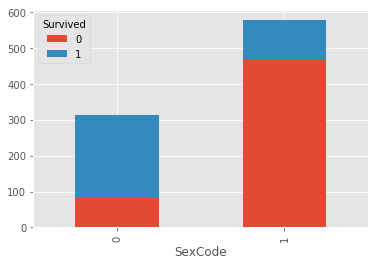

In [57]:
df.groupby(['SexCode', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Как видно, что в процентном соотношении, женщин погибло гораздо меньше чем мужчин. Возьмем этот факт на заметку.

#### Теперь посмотрим распреденение по классу

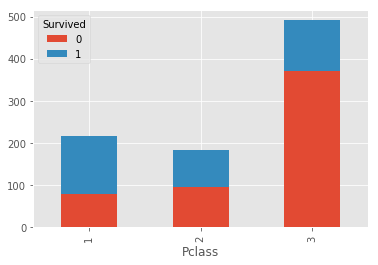

In [69]:
df.fillna(0).groupby(['Pclass', 'Survived']).size().unstack().plot(kind='bar', stacked=True);

Видно, что в 1-ом (самом дорогом и самом близким к палубе) классе выживших больше всего, тогда как в 3-м ситуация ровно противоположная.

#### Проверим, стоит ли использовать категорию Fare или лучше ориентироваться на класс

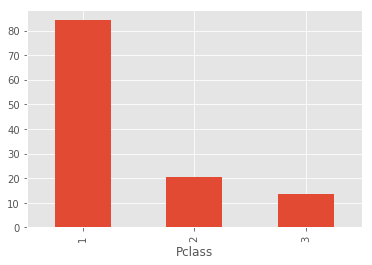

In [65]:
df.fillna(0).groupby('Pclass')['Fare'].mean().plot(kind='bar');

In [66]:
df.groupby('Pclass')['Fare'].max()

Pclass
1    512.3292
2     73.5000
3     69.5500
Name: Fare, dtype: float64

In [77]:
df[df['Fare'] > 0].groupby('Pclass')['Fare'].min()

Pclass
1     5.0000
2    10.5000
3     4.0125
Name: Fare, dtype: float64

Несмотря на то, что в среднем билеты 1-го класса стоят намного дороже чем 2-го и 3-го, но наблюается большая разница между самым дорогим и самым дешевым билетом, особенно в 1-ом классе.